<a href="https://colab.research.google.com/github/Omarelheni/skills-2-vec/blob/main/Word2VecSkills.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [17]:
import pandas as pd
from google.colab import drive
from collections import Counter
import matplotlib.pyplot as plt
import string
import numpy as np
import io
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
from wordcloud import WordCloud
from bs4 import BeautifulSoup
import pickle
import requests
import seaborn as sns

# Read Corpus

In [2]:
def download_file_from_dropbox(dropbox_url, destination):
    response = requests.get(dropbox_url, stream=True)
    with open(destination, "wb") as file:
        for chunk in response.iter_content(chunk_size=8192):
            if chunk:
                file.write(chunk)

In [3]:
corpus_list = []

In [11]:


# Dropbox direct download link (replace with your link)
dropbox_url = "https://www.dropbox.com/scl/fi/b8dkqi22jkk24s1n5gwpj/corpus_text.txt?rlkey=8hifkaxuotyrg4g1y6p8gsnuo&st=lqdngyvo&dl=1"
destination = "corpus_text.txt"

# Download the file
download_file_from_dropbox(dropbox_url, destination)

# Process the file as before
with open(destination, 'r', encoding='utf-8') as file:
    corpus_list = [line.strip() for line in file]


In [ ]:
# # Specify the file path where your data is saved
# file_path = '/content/drive/MyDrive/E-Hiring/outfile'

# # Open the file in binary mode for reading
# with open(file_path, 'rb') as fp:
#     loaded_data = pickle.load(fp)
# print(loaded_data)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



#Read Skills

In [9]:
# Dropbox direct download link
dropbox_url = "https://www.dropbox.com/scl/fi/qw6tzd4eyuxbnkyssxvce/all_skills.csv?rlkey=1b70ahhfndw97mgfz47ojcvtw&st=arca4und&dl=1"
destination = "all_skills.csv"

# Download the file
download_file_from_dropbox(dropbox_url, destination)


In [10]:
df_skills = pd.read_csv("all_skills.csv",sep=",")


In [12]:
unique_type_names = df_skills['type.name'].unique()

print(unique_type_names)

['Specialized Skill' 'Certification' 'Common Skill']


In [13]:
df_skills['type.name'].value_counts()


,count
type.name,
Specialized Skill,29096
Certification,3158
Common Skill,400


In [14]:
list_skills = []
for index,row in df_skills.iterrows():
  if row['type.name'] == "Specialized Skill":
    list_skills.append(row['name'])


In [15]:
list_skills

['.NET Assemblies',
 '.NET Development',
 '.NET Framework',
 '.NET Framework 1',
 '.NET Framework 3',
 '.NET Framework 4',
 '.NET MAUI',
 '.NET Reflector',
 '.NET Remoting',
 '.htaccess Files',
 '.nettiers',
 '10 Gigabit Ethernet',
 '1010data',
 '10BASE-F',
 '10BASE2',
 '10BASE5',
 '12 Volt Electricity',
 '128bit',
 '12factor',
 '1Password',
 '2020 Design Software',
 '2D Animation',
 '2D Computer Graphics',
 '2D Computer-Aided Drafting And Design',
 '2D Gel Analysis Software',
 '35 Mm Films',
 '360-Degree Feedback',
 '389 Directory Server',
 '3CX Phone Systems',
 '3D Animation',
 '3D Art',
 '3D Camcorder',
 '3D Computer Graphics',
 '3D Computer Graphics Software',
 '3D Conformal Radiotherapy',
 '3D Graphic Design',
 '3D Modeling',
 '3D Modeling Software',
 '3D Projection',
 '3D Reconstruction',
 '3D Rendering',
 '3D Scanning',
 '3D Touch',
 '3D Visualization',
 '3DML',
 '3DMark',
 '3DSlicer',
 '3Dvia Composer',
 '3GPP',
 '3GPP2',
 '3M',
 '3M Codefinder',
 '3M Encoder',
 '3d Engine',
 '

#Visualisation

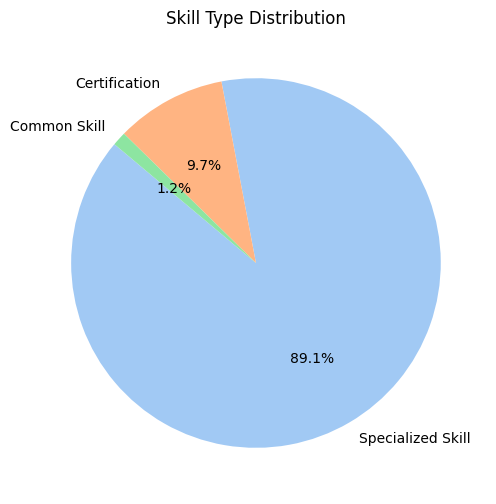

In [18]:

type_distribution = df_skills['type.name'].value_counts()
plt.figure(figsize=(8, 6))
type_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Skill Type Distribution')
plt.ylabel('')  # Hide the y-label for better visualization
plt.show()


In [ ]:
# Combine paragraphs into a single text
corpus_text = " ".join(corpus_list)

# Tokenize the text into words
words = corpus_text.split()

# Count the frequency of each skill in the text
skill_frequencies = Counter(word for word in words if word in list_skills)

# Create a WordCloud object and generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(skill_frequencies)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Skill Word Cloud")
plt.show()

#PreProcess Data

In [19]:
import string
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [20]:
'R' in list_skills

True

In [21]:
def preprocess(text):
    # Replace punctuation with spaces
    # Convert to lowercase
    text = text.lower()
    # Replace each skill phrase with the modified version
    for skill in list_skills:
        skill_lw = skill.lower()
        modified_skill = skill_lw.replace(" ", "_")
        text = text.replace(skill_lw, modified_skill)
    # Remove extra spaces
    text = re.sub(' +', ' ', text)
    return text

In [22]:
def preprocess_corpus_with_progress(corpus_list,total_descriptions,progress_interval):
    if not corpus_list:
        print("Corpus list is empty.")
        return []



    # Preprocess each job description in corpus_list
    preprocessed_corpus = []

    for idx, description in enumerate(corpus_list):
        preprocessed = preprocess(description)
        preprocessed_corpus.append(preprocessed)

        # Print progress update every 2%
        if (idx + 1) % progress_interval == 0:
            progress_percent = ((idx + 1) / total_descriptions) * 100
            print(f"Progress: {progress_percent:.1f}%")

    return preprocessed_corpus

In [23]:
# Calculate the total number of descriptions

total_descriptions = len(corpus_list)

# Define the progress update interval
progress_interval = int(0.02 * total_descriptions)  # 2% of the total
preprocessed_corpus = preprocess_corpus_with_progress(corpus_list,total_descriptions,progress_interval)

Progress: 2.0%
Progress: 4.0%
Progress: 6.0%
Progress: 8.0%
Progress: 10.0%
Progress: 12.0%
Progress: 14.0%
Progress: 16.0%
Progress: 18.0%
Progress: 20.0%
Progress: 22.0%
Progress: 24.0%
Progress: 26.0%
Progress: 28.0%
Progress: 30.0%
Progress: 32.0%
Progress: 34.0%
Progress: 36.0%
Progress: 38.0%
Progress: 40.0%
Progress: 42.0%
Progress: 44.0%
Progress: 46.0%
Progress: 48.0%
Progress: 50.0%
Progress: 52.0%
Progress: 54.0%
Progress: 56.0%
Progress: 58.0%
Progress: 60.0%
Progress: 62.0%
Progress: 64.0%
Progress: 66.0%
Progress: 68.0%
Progress: 70.0%
Progress: 72.0%
Progress: 74.0%
Progress: 76.0%
Progress: 78.0%
Progress: 80.0%
Progress: 82.0%
Progress: 84.0%
Progress: 86.0%
Progress: 88.0%
Progress: 90.0%
Progress: 91.9%
Progress: 93.9%
Progress: 95.9%
Progress: 97.9%
Progress: 99.9%


In [25]:
import spacy
from gensim.models import Word2Vec

# Load spaCy for tokenization
nlp = spacy.load("en_core_web_sm")



# Tokenize and preprocess the text data
tokenized_corpus = [doc.text.lower() for doc in nlp.pipe(preprocessed_corpus)]

# Create and train a Word2Vec model
model = Word2Vec(sentences=[sentence.split() for sentence in tokenized_corpus], vector_size=300, window=5, min_count=1, sg=0)

# Get the embedding vector for a specific IT skill
python_embedding = model.wv['python']
java_embedding = model.wv['java']
model.save("word2vec_model_2.model")


In [26]:
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity

def cosine_similarity_vector(vec1, vec2):
    """
    Calculate cosine similarity between two vectors.

    :param vec1: First vector
    :param vec2: Second vector
    :return: Cosine similarity score
    """
    dot_product = np.dot(vec1, vec2)
    norm_vec1 = np.linalg.norm(vec1)
    norm_vec2 = np.linalg.norm(vec2)
    similarity = dot_product / (norm_vec1 * norm_vec2)
    return similarity

In [27]:
it_skills = ['java', 'html', 'machine_learning', 'javascript', 'css', 'data_analysis', 'python', 'c++', 'web_development','.NET','saleforce','powerpoint']

# Calculate cosine similarity
similarities = {}
for skill in it_skills:
    skill_i = preprocess(skill).replace(' ','')
    if skill_i in model.wv:
        skill_embedding = model.wv[skill_i]
        similarity = cosine_similarity_vector(python_embedding, skill_embedding)
        similarities[skill] = similarity
sorted_skills = sorted(similarities.items(), key=lambda x: x[1], reverse=True)


# Print the sorted similarities
for skill, similarity in sorted_skills:
    print(f"Similarity between 'python' and '{skill}': {similarity}")

Similarity between 'python' and 'python': 1.0
Similarity between 'python' and 'c++': 0.682688295841217
Similarity between 'python' and 'java': 0.6266419291496277
Similarity between 'python' and 'javascript': 0.524571418762207
Similarity between 'python' and 'machine_learning': 0.46078866720199585
Similarity between 'python' and 'css': 0.35304808616638184
Similarity between 'python' and 'html': 0.33724257349967957
Similarity between 'python' and 'web_development': 0.332273006439209
Similarity between 'python' and '.NET': 0.3180686831474304
Similarity between 'python' and 'saleforce': 0.26046672463417053
Similarity between 'python' and 'data_analysis': 0.16036218404769897
Similarity between 'python' and 'powerpoint': 0.10610941797494888


In [28]:
'c++' in model.wv

True

#Evaluation